# Roches Point Weather
***

### Data Analysis
This is a data analysis for Roches Point wind speed record using Pandas Dataframe.

### Library

In [188]:
#Import required libraries

import pandas as pd # for data manipulation and analysis
import matplotlib.pyplot as plt  # for data visualisation and graphical plotting
import seaborn as sns  # built on top of matplotlib with similar functionalities
import numpy as np # for mathematical operations on arrays.
import datetime as dt

#### Load Data

In [189]:
# Load data and skip the first 17 rows.
df = pd.read_csv(r"C:\Users\phumi\OneDrive\Documents\hly1075\Roches Point Weather.csv", skiprows=17, low_memory=False)

# Display the first few rows
df.head(3)

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl,ind.3,wdsp,ind.4,wddir
0,01-dec-1955 01:00,0,0.0,0,10.7,0,10.0,9.4,11.8,91,1002.1,1,16,1,170
1,01-dec-1955 02:00,0,2.9,0,9.8,0,9.7,10.0,12.0,99,1001.8,1,11,1,190
2,01-dec-1955 03:00,0,3.8,0,9.7,0,9.5,9.4,11.7,97,1001.7,1,9,1,160


#### Examine the structure

In [190]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584831 entries, 0 to 584830
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    584831 non-null  object
 1   ind     584831 non-null  int64 
 2   rain    584831 non-null  object
 3   ind.1   584831 non-null  int64 
 4   temp    584831 non-null  object
 5   ind.2   584831 non-null  int64 
 6   wetb    584831 non-null  object
 7   dewpt   584831 non-null  object
 8   vappr   584831 non-null  object
 9   rhum    584831 non-null  object
 10  msl     584831 non-null  object
 11  ind.3   584831 non-null  int64 
 12  wdsp    584831 non-null  object
 13  ind.4   584831 non-null  int64 
 14  wddir   584831 non-null  object
dtypes: int64(5), object(10)
memory usage: 66.9+ MB


#### Change data type to floats.

`pandas.to_numeric`: Convert argument to a numeric type.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_numeric.html#pandas-to-numeric

In [191]:
# Convert windspeed to floats
df['widsp'] = pd.to_numeric(df['wdsp'], errors='coerce')

### Statistical Analysis

In [192]:
# Display summary statistics for numerical columns
df.describe()

,ind,ind.1,ind.2,ind.3,ind.4,widsp
count,584831.000000,584831.000000,584831.000000,584831.000000,584831.000000,584498.000000
mean,0.359164,0.138985,0.189511,1.037088,1.038630,10.743835
std,0.903212,0.728840,0.845802,0.904438,0.910449,7.613332
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,1.000000,10.000000
75%,0.000000,0.000000,0.000000,2.000000,2.000000,15.000000
max,8.000000,4.000000,6.000000,7.000000,7.000000,62.000000


### Cleaning Data

In [193]:
# Assign blank cells(" ") to NAN values.
df.replace(r"^\s*$", np.nan, regex=True, inplace=True)

In [194]:
# Check for missing data.
df.isnull().sum()

date         0
ind          0
rain       330
ind.1        0
temp     18722
ind.2        0
wetb     26434
dewpt    26434
vappr    49543
rhum     49540
msl      32806
ind.3        0
wdsp       333
ind.4        0
wddir      575
widsp      333
dtype: int64

#### Remove missing values

In [195]:
# Drop null values.
df.dropna(inplace = True)


In [196]:
# Check if data is clean
print(df.isna().sum())

date     0
ind      0
rain     0
ind.1    0
temp     0
ind.2    0
wetb     0
dewpt    0
vappr    0
rhum     0
msl      0
ind.3    0
wdsp     0
ind.4    0
wddir    0
widsp    0
dtype: int64


Change 'date' column to `datetime`: 

`Datetime` is a function used to convert StringType to DateType or TimestampType.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html#pandas-to-datetime

In [204]:
pd.to_datetime(df['date']).dt.strftime('%Y-%m-%dT%H:%M:%S')
df['date'] = pd.to_datetime(df['date'])
df['date']

0        1955-12-01 01:00:00
1        1955-12-01 02:00:00
2        1955-12-01 03:00:00
3        1955-12-01 04:00:00
4        1955-12-01 05:00:00
                 ...        
584826   2024-10-31 20:00:00
584827   2024-10-31 21:00:00
584828   2024-10-31 22:00:00
584829   2024-10-31 23:00:00
584830   2024-11-01 00:00:00
Name: date, Length: 528694, dtype: datetime64[ns]

### Set index to `datetime`.

`DatetimeIndex` is a fundamental object in Pandas for handling time series data, allowing for precise date and time indexing.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html#pandas-datetimeindex

In [205]:
#df.set_index('date', inplace=True)
df.set_index('date', inplace=True)
df.head(3)

,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl,ind.3,wdsp,ind.4,wddir,widsp
date,,,,,,,,,,,,,,,
1955-12-01 01:00:00,0,0.0,0,10.7,0,10.0,9.4,11.8,91,1002.1,1,16,1,170,16.0
1955-12-01 02:00:00,0,2.9,0,9.8,0,9.7,10.0,12.0,99,1001.8,1,11,1,190,11.0
1955-12-01 03:00:00,0,3.8,0,9.7,0,9.5,9.4,11.7,97,1001.7,1,9,1,160,9.0


### Resample

`dataframe.resample()`: convenience method for frequency conversion and resampling of time series.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html

In [207]:
# Resample to daily frequency and aggregate wind speed statistics
daily_stats = df['widsp'].resample('D').agg(['mean', 'min', 'max'])

# Daily statistics windspeed 
daily_stats

,mean,min,max
date,,,
1955-12-01,11.826087,4.0,16.0
1955-12-02,11.875000,0.0,23.0
1955-12-03,8.166667,2.0,14.0
1955-12-04,5.791667,0.0,15.0
1955-12-05,16.666667,13.0,21.0
...,...,...,...
2024-10-28,9.750000,6.0,14.0
2024-10-29,4.916667,1.0,12.0
2024-10-30,3.583333,1.0,6.0


In [209]:
# Resample to monthly frequency and aggregate wind speed statistics
monthly_stats = df['widsp'].resample('M').agg(['mean', 'min', 'max'])
monthly_stats

C:\Users\phumi\AppData\Local\Temp\ipykernel_22120\1458472600.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_stats = df['widsp'].resample('M').agg(['mean', 'min', 'max'])


,mean,min,max
date,,,
1955-12-31,14.767160,0.0,36.0
1956-01-31,11.467742,0.0,48.0
1956-02-29,11.448276,0.0,35.0
1956-03-31,15.384409,0.0,32.0
1956-04-30,10.056944,0.0,32.0
...,...,...,...
2024-07-31,10.250000,1.0,26.0
2024-08-31,12.625000,2.0,33.0
2024-09-30,12.211111,1.0,33.0


In [210]:
# Resample to monthly frequency and aggregate wind speed statistics
yearly_stats = df['widsp'].resample('Y').agg(['mean', 'min', 'max'])
yearly_stats

C:\Users\phumi\AppData\Local\Temp\ipykernel_22120\2116839114.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_stats = df['widsp'].resample('Y').agg(['mean', 'min', 'max'])


,mean,min,max
date,,,
1955-12-31,14.767160,0.0,36.0
1956-12-31,12.110997,0.0,48.0
1957-12-31,11.839155,0.0,54.0
1958-12-31,11.665297,0.0,50.0
1959-12-31,11.964612,0.0,55.0
...,...,...,...
2020-12-31,13.123862,1.0,51.0
2021-12-31,11.782877,1.0,44.0
2022-12-31,12.417009,1.0,55.0


#### Plots for Windspeed Data

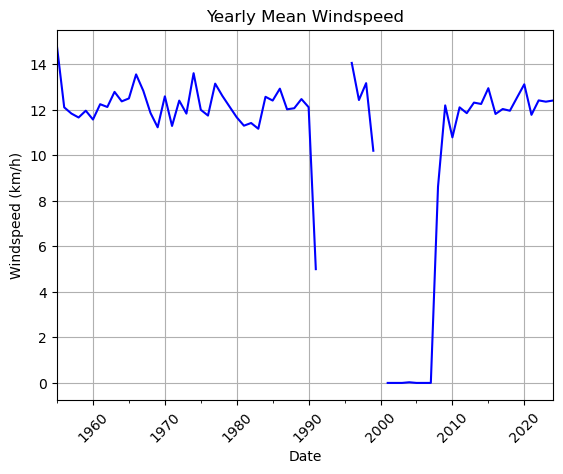

In [236]:
# Plot daily mean windspeed over time

#plt.figure(figsize=(8, 6))
yearly_stats['mean'].plot(color='blue', label='Mean Wind Speed')
#monthly_stats['mean'].plot(color='red') #label='Monthly Mean Windspeed')
plt.xlabel('Date')
plt.ylabel('Windspeed (km/h)')

plt.xticks(rotation=45)
plt.grid(True)
plt.title('Yearly Mean Windspeed')
plt.savefig('img/yearly_mean_windpeed')

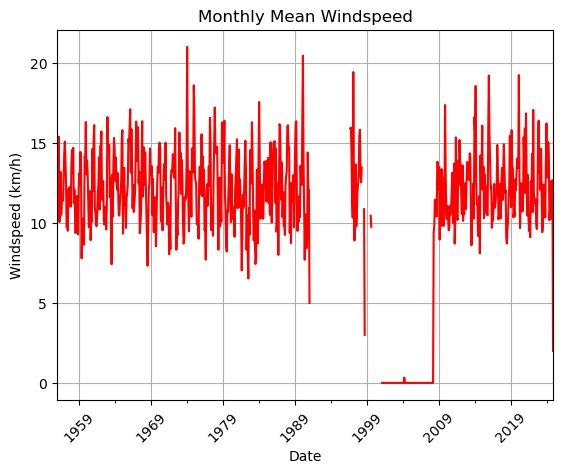

In [234]:
# Plot monthly mean windspeed over time

#plt.figure(figsize=(8, 6))
monthly_stats['mean'].plot(color='red') #label='Monthly Mean Windspeed')
plt.xlabel('Date')
plt.ylabel('Windspeed (km/h)')

plt.xticks(rotation=45)
plt.grid(True)
plt.title('Monthly Mean Windspeed')
plt.savefig('img/monthly_mean_windpeed')



`The groupby()` function allows you to group your data and execute functions on these groups.

https://www.w3schools.com/python/pandas/ref_df_groupby.asp

### End